--- Missing values immediately after loading CSV ---
Series([], dtype: int64)
Total missing values found: 0


--- Missing values after final imputation ---
Series([], dtype: int64)
Total missing values remaining: 0

--- Data is clean. Applying PCA. ---


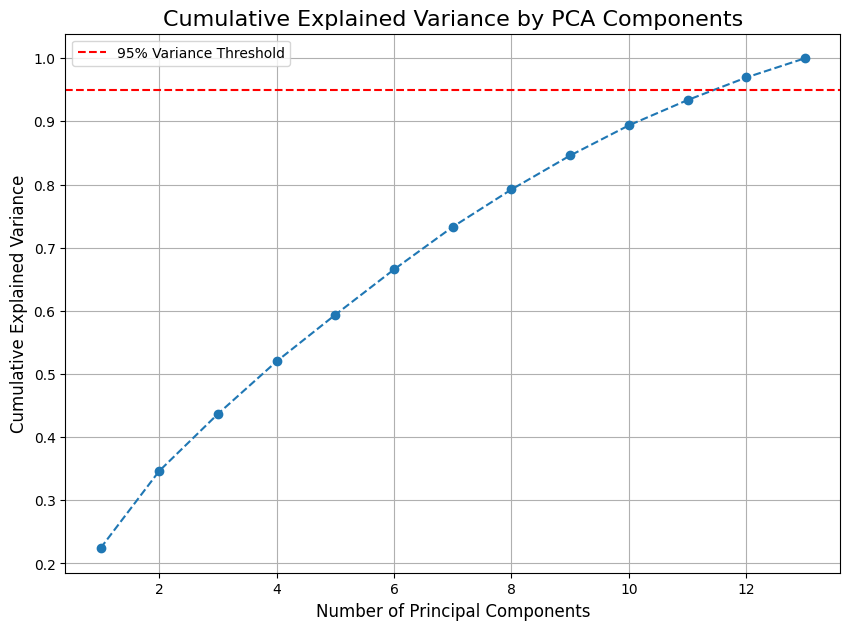

Number of components to explain 95% of variance: 12


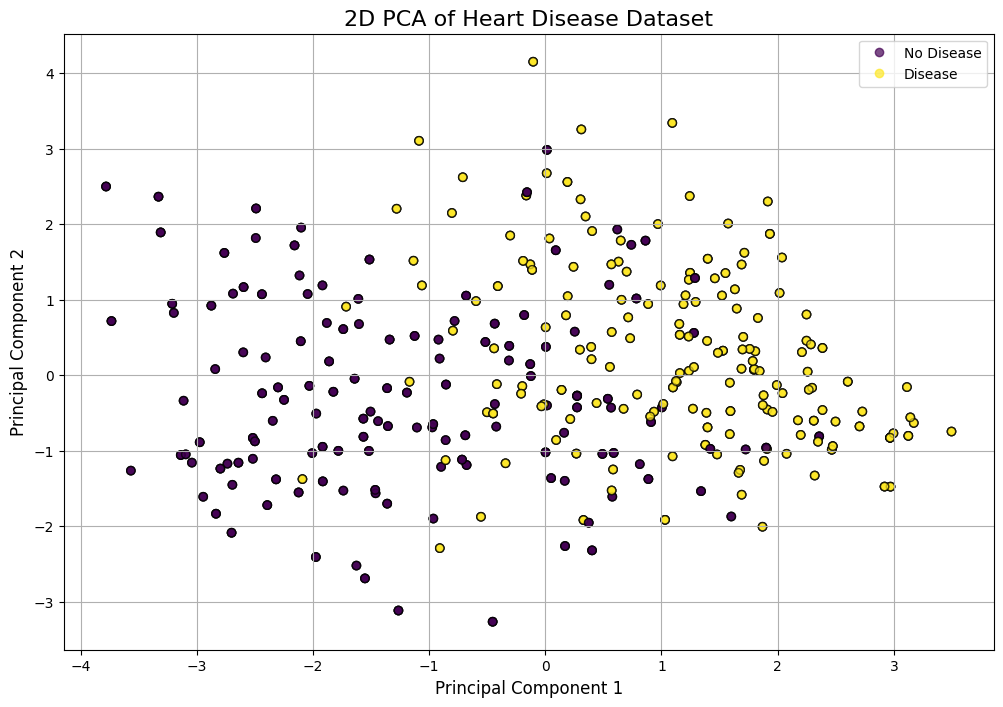

In [10]:
# --- Cell 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Cell 2: Load and Verify Cleaned Data ---
df = pd.read_csv('../data/heart_disease_cleaned.csv')

# --- Verification Step 1: Check for NaNs immediately after loading ---
# This tells us if the CSV file itself has missing values.
print("--- Missing values immediately after loading CSV ---")
initial_nans = df.isnull().sum()
print(initial_nans[initial_nans > 0])
print(f"Total missing values found: {df.isnull().sum().sum()}\n")


# --- The Fix: A more robust imputation step ---
# If there are any NaNs, we fill them with the median of their respective column.
# This makes this notebook resilient to any issues from the preprocessing step.
if df.isnull().sum().sum() > 0:
    print("--- Applying median imputation as a safeguard ---")
    df.fillna(df.median(), inplace=True)


# --- Verification Step 2: Confirm that all NaNs are gone ---
print("\n--- Missing values after final imputation ---")
final_nans = df.isnull().sum()
print(final_nans[final_nans > 0])
print(f"Total missing values remaining: {df.isnull().sum().sum()}\n")


# If the count above is 0, the rest of the script is guaranteed to work.
# Separate features and target variable
# We add a check to ensure the 'target' column exists before dropping it
if 'target' not in df.columns:
    raise ValueError("'target' column not found in the dataframe.")
    
X = df.drop('target', axis=1)
y = df['target']


# --- Cell 3: Scale the Data ---
# PCA is sensitive to the scale of the features, so we must standardize them first.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Cell 4: Apply PCA ---
print("--- Data is clean. Applying PCA. ---")
# Initialize PCA to capture all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled) # This will now work without errors


# --- Cell 5: Explained Variance Analysis ---
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components', size=16)
plt.xlabel('Number of Principal Components', size=12)
plt.ylabel('Cumulative Explained Variance', size=12)
plt.grid(True)
# Add a line for 95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()

# Find the number of components needed to explain 95% of the variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components to explain 95% of variance: {n_components_95}")


# --- Cell 6: Visualize PCA in 2D ---
# Use the first two principal components for a 2D scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('2D PCA of Heart Disease Dataset', size=16)
plt.xlabel('Principal Component 1', size=12)
plt.ylabel('Principal Component 2', size=12)
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Disease'])
plt.grid(True)
plt.show()